In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [ ]:
### Base path to files
base_path = '{path_to_main_folder}'

In [3]:
topo = xr.open_dataset(base_path + '{path_to_created_bathymetry}/adapted_bathymetry.nc')
lats = topo.variables['T_LAT_2D'][:,:]
lons = topo.variables['T_LON_2D'][:,:]
latsu = topo.variables['U_LAT_2D'][:,:]
lonsu = topo.variables['U_LON_2D'][:,:]
bathy = topo.variables['Bathymetry'][:,:]

# Fields

## Salinity

Load and inspect the datafile:

In [64]:
sal = xr.open_dataset('{path_to_single_forcing_model_salinity_file}') # File used here: SALT_00380101.nc

FileNotFoundError: [Errno 2] No such file or directory: b'/storage/shared/pop/p21a.EO38Ma.tx0.1.2pic_control/daily/SALT_00380101.nc'

Land values are set to zero everywhere, so instead make these nan and plot the mean values:

In [214]:
salnan = sal['SALT'].where(sal['SALT'] > 0)

In [215]:
salnan.min(), salnan.max()

(<xarray.DataArray 'SALT' ()>
 array(0.02496704),
 <xarray.DataArray 'SALT' ()>
 array(0.05222407))

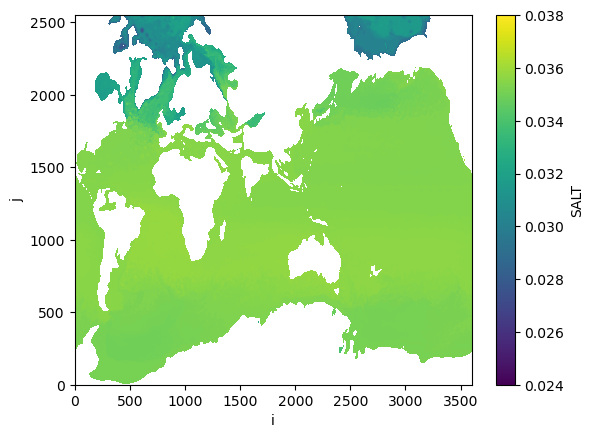

In [216]:
salnan.mean('k').plot(vmin=0.024, vmax=0.038);

Transects: mean in southern hemisphere and global transects at specific points

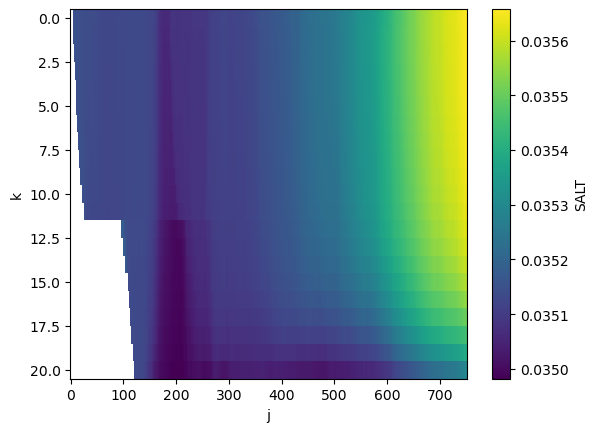

In [217]:
salnan.mean('i')[:,:752].plot(yincrease=False);

In [218]:
dep = np.array([500.622, 1506.873, 2528.343, 3575.849, 4661.269, 5798.099,
                7002.139, 8292.409, 9692.414, 11231.89, 12949.36, 14895.82,
                17140.44, 19779.19, 22948.42, 26846.17, 31765.01, 38138.64,
                46591.32, 57930.72, 72935.12])/100.

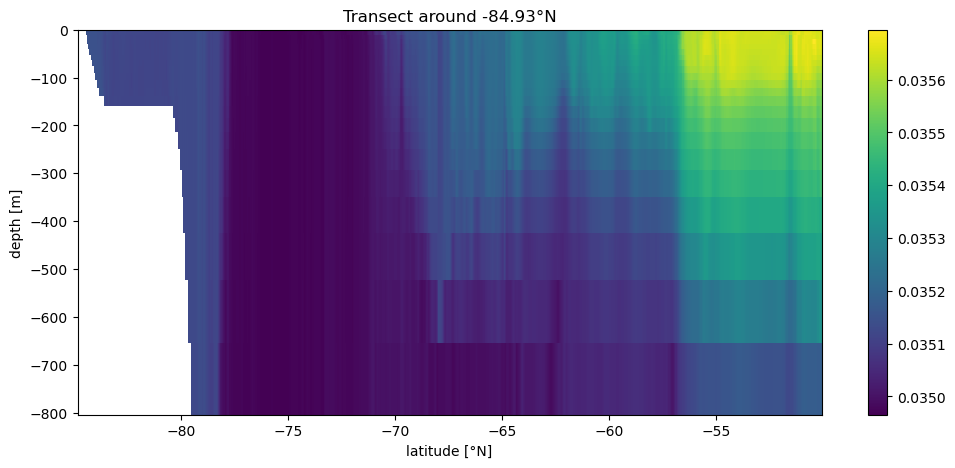

In [219]:
ix = 500

s = salnan.isel(i=ix)[:,:752]
xx, yy = np.meshgrid(lats.isel(i_index=ix)[:752], dep)

fig, ax = plt.subplots(figsize=(12,5))
im = ax.pcolormesh(xx, -yy, s)
fig.colorbar(im, ax=ax)
ax.set_xlabel('latitude [°N]')
ax.set_ylabel('depth [m]')
ax.set_title(f'Transect around {lons.isel(i_index=ix)[-1].data:3.2f}°N')
plt.show()

Select Weddell Sea region:

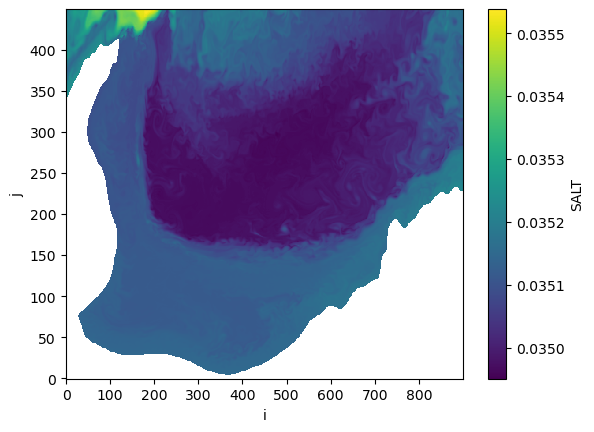

In [224]:
salnan.mean('k').isel(i=slice(100,1000), j=slice(0,450)).plot();

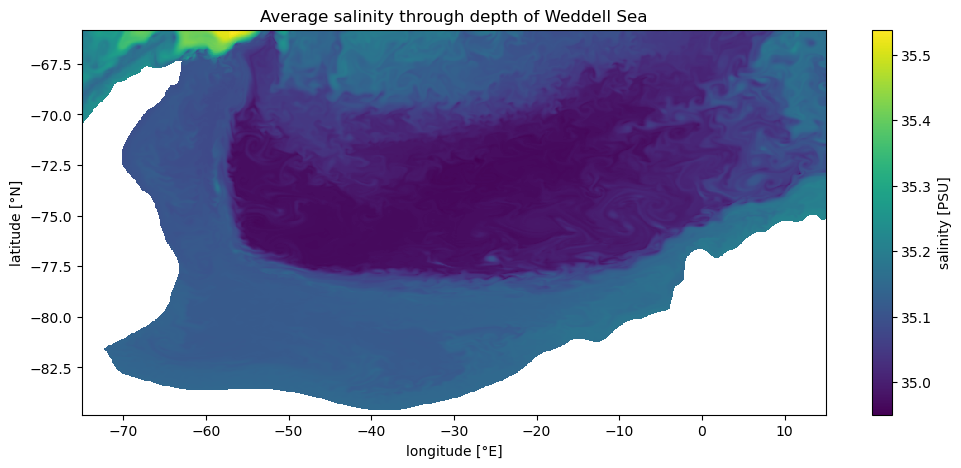

In [225]:
s = salnan.isel(i=slice(100,1000), j=slice(0,450)).mean('k')
xx, yy = np.meshgrid(lons.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('j_index'), lats.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('i_index'))

fig, ax = plt.subplots(figsize=(12,5))
im = ax.pcolormesh(xx, yy, s*1000.)
cb = fig.colorbar(im, ax=ax)
cb.set_label(label='salinity [PSU]')
ax.set_xlabel('longitude [°E]')
ax.set_ylabel('latitude [°N]')
ax.set_title('Average salinity through depth of Weddell Sea')
plt.show()

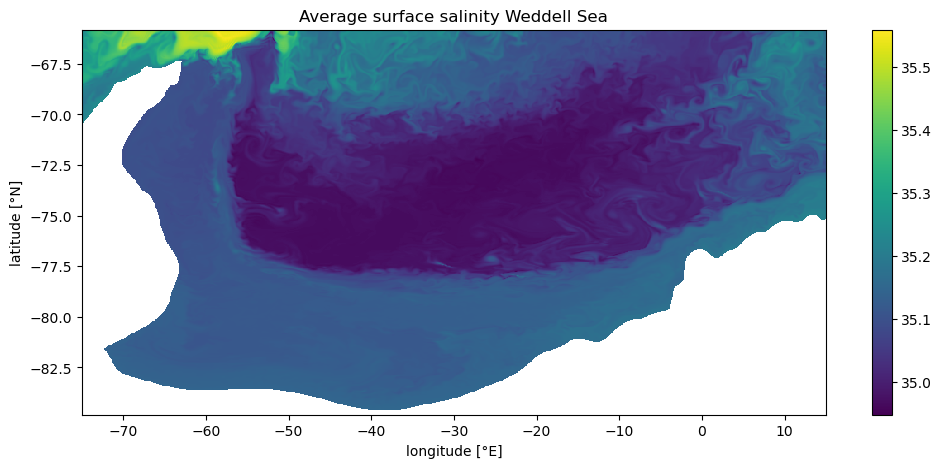

In [226]:
s = salnan.isel(i=slice(100,1000), j=slice(0,450)).isel(k=0)
xx, yy = np.meshgrid(lons.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('j_index'), lats.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('i_index'))

fig, ax = plt.subplots(figsize=(12,5))
im = ax.pcolormesh(xx, yy, s*1000.)
fig.colorbar(im, ax=ax)
ax.set_xlabel('longitude [°E]')
ax.set_ylabel('latitude [°N]')
ax.set_title('Average surface salinity Weddell Sea')
plt.show()

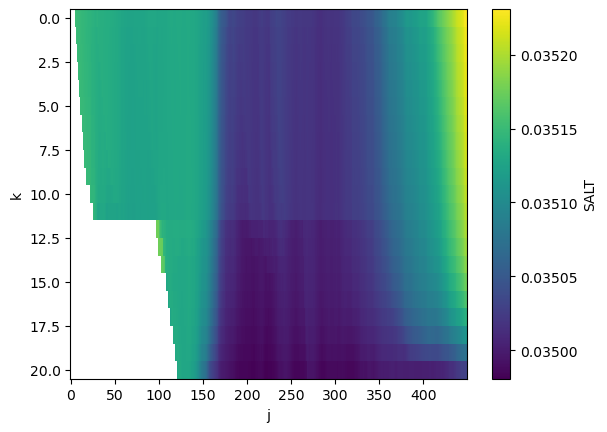

In [223]:
salnan.isel(i=slice(100,1000), j=slice(0,450)).mean('i').plot(yincrease=False);

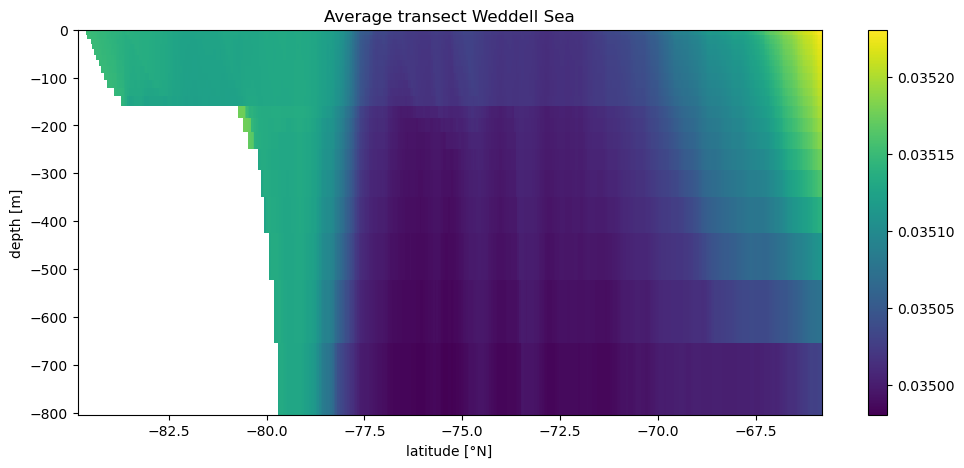

In [174]:
s = salnan.isel(i=slice(100,1000), j=slice(0,450)).mean('i')
xx, yy = np.meshgrid(lats.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('i_index'), dep)

fig, ax = plt.subplots(figsize=(12,5))
im = ax.pcolormesh(xx, -yy, s)
fig.colorbar(im, ax=ax)
ax.set_xlabel('latitude [°N]')
ax.set_ylabel('depth [m]')
ax.set_title('Average transect Weddell Sea')
plt.show()

In [227]:
Savg = salnan.isel(i=slice(100,1000), j=slice(0,450)).mean().data
Savg*1000.

35.063162446022034

In [228]:
Tf = -5.73e-2*(Savg*1000.) + 9.39e-2
Tf

-1.9152192081570623

In [2]:
-5.73e-2*(34.95) + 9.39e-2, -5.73e-2*(35.55) + 9.39e-2

(-1.908735, -1.9431149999999997)